In [ ]:
!pip install pyproj

In [ ]:
from pyproj import CRS
from pyproj.aoi import AreaOfInterest
from pyproj.database import query_utm_crs_info

utm_crs_list = query_utm_crs_info(
    datum_name="WGS 84",
    area_of_interest=AreaOfInterest(
        west_lon_degree=-93.581543,
        south_lat_degree=42.032974,
        east_lon_degree=-93.581543,
        north_lat_degree=42.032974,
    ),
)
print(utm_crs_list)
print("the first code:",CRS.from_epsg(utm_crs_list[0].code))


[CRSInfo(auth_name='EPSG', code='32615', name='WGS 84 / UTM zone 15N', type=<PJType.PROJECTED_CRS: 'PROJECTED_CRS'>, deprecated=False, area_of_use=AreaOfUse(west=-96.0, south=0.0, east=-90.0, north=84.0, name='Between 96°W and 90°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Ontario. Ecuador -Galapagos. Guatemala. Mexico. United States (USA).'), projection_method_name='Transverse Mercator')]
the first code: EPSG:32615


In [ ]:
CRS.from_epsg(4326)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
CRS.from_epsg(3725)

<Projected CRS: EPSG:3725>
Name: NAD83(NSRS2007) / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - between 78°W and 72°W onshore and offshore - Connecticut; Delaware; Maryland; Massachusetts; New Hampshire; New Jersey; New York; North Carolina; Pennsylvania; Virginia; Vermont.
- bounds: (-78.0, 28.28, -72.0, 45.03)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2007)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Using GeoPandas for spatial data IO and simple mapping

Import the entire `geopandas` library with gpd being the alias

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
cntyDat = gpd.read_file('/home/gz_2010_us_050_00_20m.json', driver = 'GeoJSON')

In [ ]:
print("Simple Print\n", cntyDat.head(3))
print("\nType of the data is: {}".format(type(cntyDat)))
print(f"\nThe type of the geometry column is: {type(cntyDat.geometry)}")

print("\nType of the geometry object is: {}".format(type(cntyDat.geometry[0])))

Simple Print
            GEO_ID STATE COUNTY      NAME    LSAD  CENSUSAREA  \
0  0500000US01001    01    001   Autauga  County     594.436   
1  0500000US01009    01    009    Blount  County     644.776   
2  0500000US01017    01    017  Chambers  County     596.531   

                                            geometry  
0  POLYGON ((-86.49677 32.34444, -86.71790 32.402...  
1  POLYGON ((-86.57780 33.76532, -86.75914 33.840...  
2  POLYGON ((-85.18413 32.87053, -85.12342 32.772...  

Type of the data is: <class 'geopandas.geodataframe.GeoDataFrame'>

The type of the geometry column is: <class 'geopandas.geoseries.GeoSeries'>

Type of the geometry object is: <class 'shapely.geometry.polygon.Polygon'>


<Axes: >

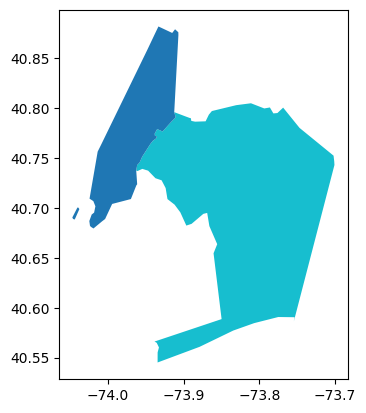

In [ ]:
cntyDat.query('STATE == "36" and (NAME == "New York" or NAME == "Queens")').plot(column="NAME")
#cntyDat.query('STATE == "44"').to_crs(3725).plot(column="CENSUSAREA", kind='bar')

In [ ]:
!pip install mapclassify

In [ ]:
from mapclassify import classify

In [119]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 47.5 MB/s eta 0:00:00


In [129]:
cx.add_basemap(ax, crs=df.crs)

<Figure size 640x480 with 0 Axes>

In [ ]:
m = cntyDat.query('STATE == "36"').to_crs(4326).explore()
# In case VS code does not support this type of data.
m.save('map.html')
m = cntyDat.query('STATE == "36"').explore()
m

In [ ]:
m = cntyDat.query('STATE == "36"').to_crs(4326).explore(column='NAME', legend=False);
#cntyDat.to_crs(4326).explore(column = "STATE", m = m, legend=False)
m

In [90]:
tracts = gpd.read_file('zip:///home/CON22_June_03_2022.zip', driver = 'GeoJSON')
elecDistctMap = tracts.explore(column='DISTRICT',cmap ="inferno", legend=True)
elecDistctMap.save('CON22Map.html')

elecDistctMap

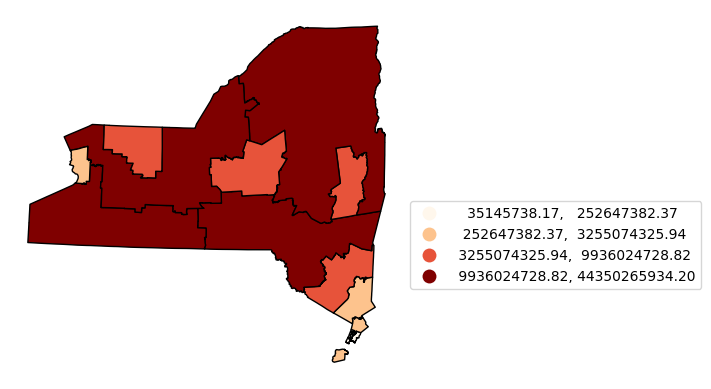

In [92]:
import matplotlib.pyplot as plt
ax = tracts.query('DISTRICT > 10').plot(column="Shape_Area", cmap ="OrRd", scheme="quantiles", k=4, edgecolor="k", legend=True,legend_kwds={ "loc": "upper left", "bbox_to_anchor": (1, 0.5)})
ax.set_axis_off()
#cntyDat.query('STATE == "36"').plot(column="CENSUSAREA", cmap ="viridis", scheme="quantiles", k=4, edgecolor="k", legend = True)

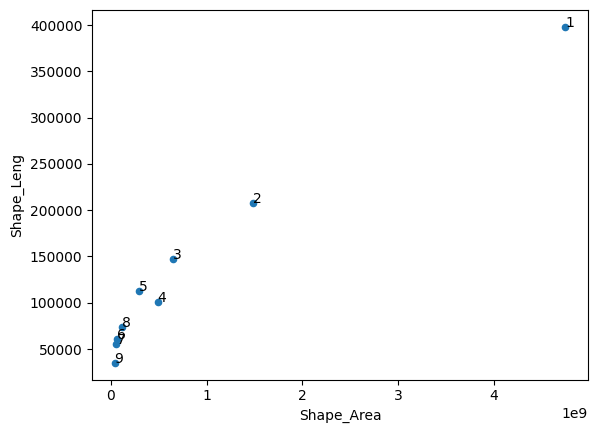

In [ ]:
ax = tracts.query('DISTRICT <10').plot(x="Shape_Area", y="Shape_Leng", kind="scatter", legend=True)
for k in range(10):
   ax.annotate(tracts["DISTRICT"].to_numpy()[k], (tracts["Shape_Area"].to_numpy()[k],tracts["Shape_Leng"].to_numpy()[k]))


In [98]:
!pip install matplotlib_scalebar

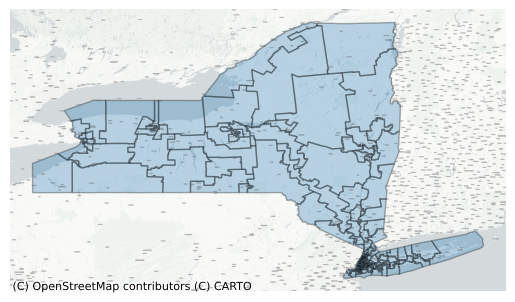

In [136]:
df = gpd.read_file("zip:///home/2022assembly_shape_file.zip")
ax = df.plot(alpha=0.3, edgecolor="k")
ax.set_axis_off()
import contextily as cx
cx.add_basemap(ax, crs=df.crs)
#cx.add_basemap(ax, crs=df.crs, source=cx.providers.CartoDB.Positron)

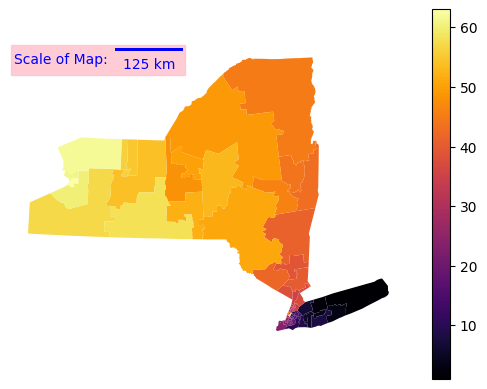

In [112]:
e = gpd.read_file("zip:///home/SEN22_June_03_2022.zip")
ax = e.plot(column='District',cmap ="inferno", legend=True)
ax.set_axis_off()

from matplotlib_scalebar.scalebar import ScaleBar
ax.add_artist(ScaleBar(
    dx=1,
    label="Scale of Map:",
    location="upper left",  # in relation to the whole plot
    label_loc="left",
    scale_loc="bottom",  # in relation to the line
    color="blue",
    box_color="pink",
    box_alpha=0.8,
))

In [174]:
c = gpd.read_file('/home/gz_2010_us_050_00_20m.json', driver = 'GeoJSON')
new = c.query('STATE != "02"')
new.explore(column='CENSUSAREA',cmap ="viridis", legend=True)

In [ ]:
tracts.geometry.dtypes
type(tracts.geometry)

geopandas.geoseries.GeoSeries

In [131]:
cntyDat = gpd.read_file('/home/gz_2010_us_050_00_20m.json', driver = 'GeoJSON')
cntyDat.to_file('us_census.gpkg', layer='counties', driver='GPKG')
cntyDat.query('STATE=="36"').to_file('us_census.gpkg', layer='ny_counties', driver='GPKG')
cntyDat.query('STATE == "36" and (NAME in ["New York", "Queens"])').to_file('us_census.gpkg', layer='district_counties', driver='GPKG')

In [133]:
input_file = "/content/us_census.gpkg"
data = gp.read_file(input_file,layer='district_counties')
print(data)

           GEO_ID STATE COUNTY      NAME    LSAD  CENSUSAREA  \
0  0500000US36081    36    081    Queens  County     108.532   
1  0500000US36061    36    061  New York  County      22.829   

                                            geometry  
0  POLYGON ((-73.86892 40.69515, -73.87402 40.694...  
1  MULTIPOLYGON (((-74.04086 40.70012, -74.04002 ...  


## an example for overlay function

In [ ]:
# an example for overlay function
import geopandas as gp
import matplotlib.pyplot as plt

biomes_file_path = 'Brazil_biomes.geojson'
conservation_file_path = 'conservation_units_amazon_biome.shx'
states_file_path = 'geoBoundaries-BRA-ADM1.geojson'


#turning the files into GeoDataFrames
biomes_gdf = gp.read_file(biomes_file_path)
conser_gdf = gp.read_file(conservation_file_path)
states_gdf = gp.read_file(states_file_path)

#plotting biomes and states
ax1 = biomes_gdf.plot(column='name', legend=True, figsize=(10, 8))

states_gdf.plot(ax=ax1, edgecolor='black', linewidth=0.5, facecolor='none')

legend1 = ax1.get_legend()
legend1.set_title('Biomes')

plt.show()

#plotting the biome amazonia and the layer of the conservation areas in the biome

biome_name = 'Amazônia'

filtered = biomes_gdf[biomes_gdf['name'] == biome_name]

ax2 = filtered.plot(edgecolor='black', linewidth=0.1, facecolor='lightgreen')

conser_gdf.plot(ax=ax2, edgecolor='black', linewidth=0.5, facecolor='green', figsize=(10, 8))

plt.title("Conservation areas within the Amazonia Biome")

plt.show()

## Extra attempts

In [ ]:
import pandas as pd
import geopandas
import folium
import geodatasets
import matplotlib.pyplot as plt

